# Project 3: Time Series Analysis and Forecasting

For this project, time series analysis and forecasting will be used to predict the future price of Microsoft stock.

The original file for this dataset can be found at this URL: https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

### Importing modules

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

### Importing the dataset

In [2]:
df = pd.read_csv('C:/Users/19145/Documents/CS675_Jupyter_Notebooks/project_files/Microsoft_Stock.csv')
df.shape

(1511, 6)

In [3]:
df.head(15)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00,41.76,42.46,41.68,42.26,27343581


### Descriptive Statistics

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### Data Dictionary

<b>Date</b> - The date pertaining to the prices being reported.

<b>Open</b> - Opening price of the stock.

<b>High</b> - Stock's daily high.

<b>Low</b> - Stock's daily low.

<b>Close</b> - Stock's closing price.

<b>Volume</b> - The number of shares traded for the day.

The target variable for this project will be the stock's closing price.

### Setting the Date Index

In [6]:
# Format the date field
df.set_index(df['Date'], inplace=True)
df.index = pd.to_datetime(df['Date'])

# Set the date field as the index
del df['Date']
df.head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861
2015-04-10 16:00:00,41.63,41.95,41.41,41.72,28022002
2015-04-13 16:00:00,41.40,42.06,41.39,41.76,30276692
2015-04-14 16:00:00,41.80,42.03,41.39,41.65,24244382


### Checking for Missing Values

The following is a summary of the missing values in our dataset:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


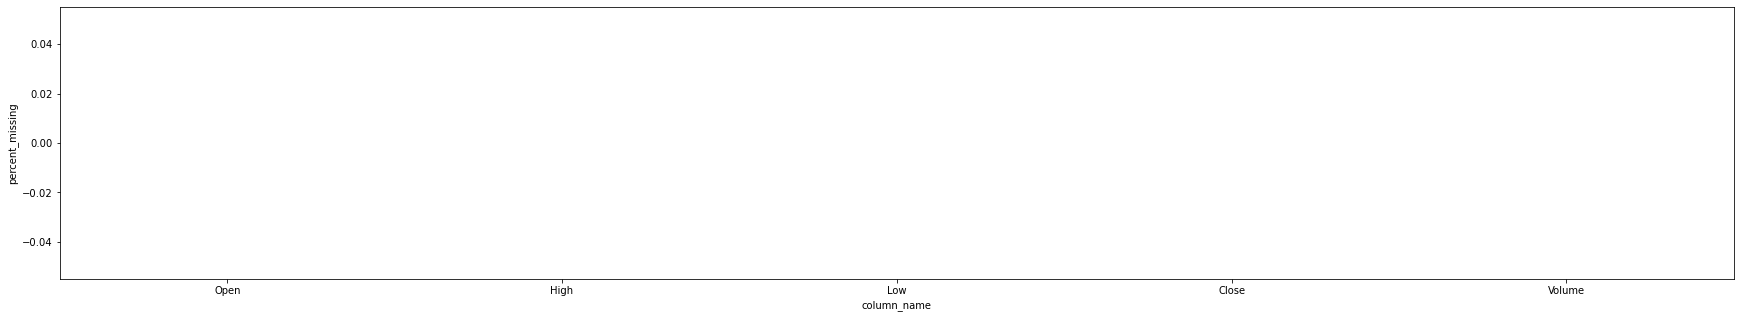

In [7]:
print("The following is a summary of the missing values in our dataset:")
print(df.isna().sum().sort_values(ascending=False))

# Calculate the percentage of missing values for each column
perc_missing = df.isnull().sum() * 100 / len(df)
df_missing_values = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': perc_missing})
df_missing_values.sort_values('percent_missing', inplace=True, ascending=False)

# Construct a plot to display the percentages of missing values
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(
    x='column_name',
    y='percent_missing',
    data=df_missing_values,
    ax=ax
)
plt.xlabel('column_name')
plt.ylabel('percent_missing')
plt.show()

No missing values were discovered in this dataset.

### Plotting the Time Series

The time series will be plotted to discover any patterns within the data.

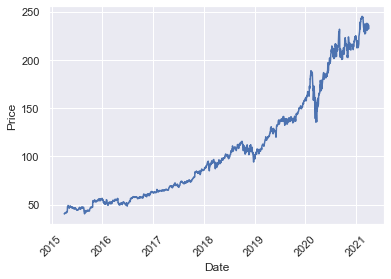

In [8]:
sns.set()
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df.index, df['Close'])

The pattern discovered from this plot is an upward trend, meaning that the price of Microsoft stock has been increasing over time. It is important to note the 'dip' in the early part of 2020 because that signifies the start of the pandemic. There also appears to be some seasonality in the data which represents how the stock has risen or fallen on a regular basis.

A Time Series Decomposition will be applied to learn more about the seasonality as well as the trend.

### Time Series Decomposition

For the Time Series Decomposition, the additive model will be used because the trend and seasonality of the data appears to be constant. Also, the data is to be aggregated by month so the period will be set to 30.

In [9]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

<AxesSubplot:xlabel='Date'>

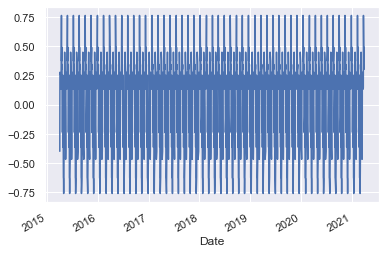

In [10]:
decomposition.seasonal.plot()

<AxesSubplot:xlabel='Date'>

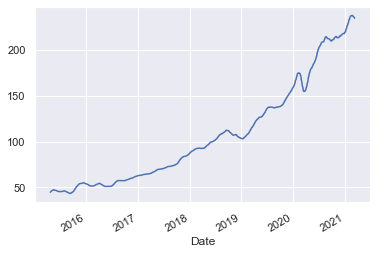

In [11]:
decomposition.trend.plot()

<AxesSubplot:xlabel='Date'>

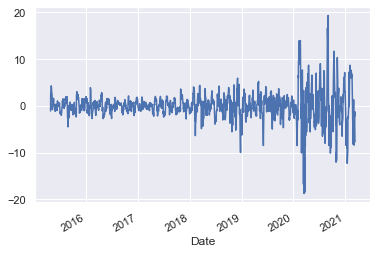

In [12]:
decomposition.resid.plot()

The Time Series Decomposition shows that there is strong seasonality in the data and confirms the upward trend in the rise of Microsoft's stock. The growth of the stock also appears to be exponential based on the shape of the curve.

### Autocorrelation

An autocorrelation function will be used to determine how the future price of the stock is influenced by its previous prices.

In [13]:
# Extract the closing prices of Microsoft stock
prices = pd.DataFrame(df['Close'].values)

# Shift the prices
acf_df = pd.concat([prices.shift(15), prices.shift(14), prices.shift(13), prices.shift(12),
                    prices.shift(11), prices.shift(10), prices.shift(9), prices.shift(8),
                    prices.shift(7), prices.shift(6), prices.shift(5), prices.shift(4),
                   prices.shift(3), prices.shift(2), prices.shift(1), prices], axis=1)

# Assign column names
acf_df.columns = ['t', 't+1', 't+2', 't+3', 
                  't+4', 't+5', 't+6', 't+7',
                  't+8', 't+9', 't+10', 't+11',
                  't+12', 't+13', 't+14', 't+15']

# Compute the correlation
result = acf_df.corr(method='pearson')
result.style.background_gradient(cmap='coolwarm')


,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12,t+13,t+14,t+15
t,1.000000,0.999109,0.998717,0.998167,0.997583,0.997070,0.996554,0.996243,0.995688,0.995388,0.994799,0.994386,0.993957,0.993499,0.993220,0.992843
t+1,0.999109,1.000000,0.999112,0.998721,0.998173,0.997591,0.997073,0.996558,0.996255,0.995703,0.995403,0.994811,0.994404,0.993975,0.993512,0.993241
t+2,0.998717,0.999112,1.000000,0.999115,0.998725,0.998180,0.997595,0.997078,0.996570,0.996269,0.995718,0.995415,0.994829,0.994422,0.993990,0.993534
t+3,0.998167,0.998721,0.999115,1.000000,0.999117,0.998729,0.998183,0.997600,0.997089,0.996582,0.996281,0.995730,0.995431,0.994846,0.994437,0.994010
t+4,0.997583,0.998173,0.998725,0.999117,1.000000,0.999121,0.998728,0.998183,0.997608,0.997099,0.996592,0.996289,0.995744,0.995444,0.994856,0.994454
t+5,0.997070,0.997591,0.998180,0.998729,0.999121,1.000000,0.999119,0.998726,0.998189,0.997617,0.997108,0.996600,0.996301,0.995757,0.995453,0.994872
t+6,0.996554,0.997073,0.997595,0.998183,0.998728,0.999119,1.000000,0.999122,0.998728,0.998191,0.997623,0.997118,0.996610,0.996313,0.995771,0.995468
t+7,0.996243,0.996558,0.997078,0.997600,0.998183,0.998726,0.999122,1.000000,0.999122,0.998728,0.998195,0.997631,0.997125,0.996620,0.996325,0.995784
t+8,0.995688,0.996255,0.996570,0.997089,0.997608,0.998189,0.998728,0.999122,1.000000,0.999125,0.998732,0.998199,0.997639,0.997135,0.996628,0.996337
t+9,0.995388,0.995703,0.996269,0.996582,0.997099,0.997617,0.998191,0.998728,0.999125,1.000000,0.999127,0.998733,0.998205,0.997646,0.997139,0.996638


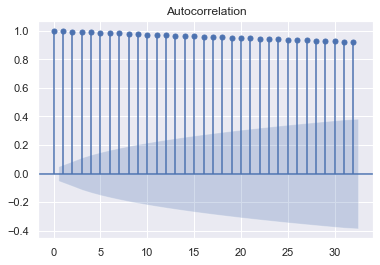

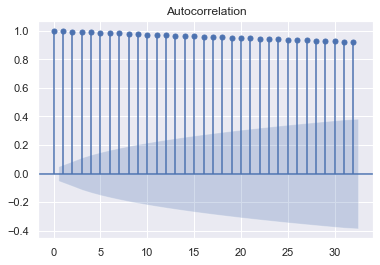

In [14]:
plot_acf(prices)

The correlation matrix and autocorrelation plot both show a strong positive relationship between the price of stock on a given date and its most recent values. This relationship weakens the further away the data moves from that given point in time.

### Splitting Data for Training and Testing

The data will be split into training and testing sets to be used by the models for predicting the stock price.
The training set will consist of the data before June 2020 and the testing set will consist of data as of June 2020 and beyond.

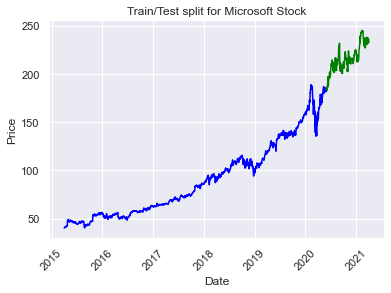

In [15]:
train = df[df.index < pd.to_datetime("2020-06-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

plt.plot(train.index, train['Close'], color="blue")
plt.plot(test.index, test['Close'], color="green")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.show()

### Preventing Background Noise

When running the models on a time series, several warnings may appear that may affect the performance of the code. The following line will prevent these warnings from appearing and interfering with the execution of the models.

In [16]:
# This line of code will prevent background noise from hindering the running of the following procedures.
warnings.filterwarnings("ignore")

### ARIMA Model

The ARIMA Model will be used to predict values without assuming stationality.

In [17]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (2, 2, 2))

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

### SARIMA Model

The SARIMA Model will be used to capture historical values, shock events, and seasonality.

In [18]:
# Define the input
y = train['Close']

# Define the model
SARIMAXmodel = SARIMAX(y, order = (2, 2, 2), seasonal_order=(2,2,2,12))

# Fit the model
SARIMAXmodel = SARIMAXmodel.fit()

# Generate predictions
y_pred_2 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_2 = y_pred_2.conf_int(alpha = 0.05)
y_pred_df_2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_2.index[0], end = y_pred_df_2.index[-1])
y_pred_df_2.index = test.index
y_pred_out_2 = y_pred_df_2["Predictions"]

### Visualize the Results

The results of the ARIMA and SARIMA models will be plotted below. Then, the Root Mean Squared Error of each model will be calculcated to estimate the accuracy of the predictions.

ARIMA RMSE:  19.58626536824896
SARIMA RMSE:  11.393397710723283


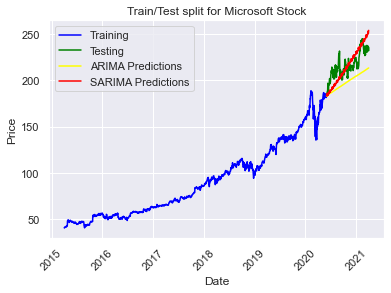

In [19]:
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

The plot shows that the SARIMA model did a better job at predicting the future stock prices than the ARIMA model based on how close its graph is aligned to the increasing trend. The RMSE also confirms this with SARIMA having an RMSE score of ~11.39 and the ARIMA having an RMSE score of ~19.60.

To improve the ARIMA model, the differencing parameter will be adjusted.

### Improving ARIMA

ARIMA RMSE:  10.949297322770152
SARIMA RMSE:  11.393397710723283


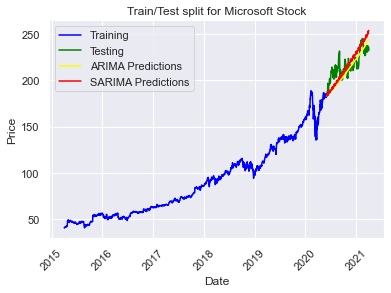

In [20]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (2, 3, 2)) #--The differencing parameter is increased by 1.

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

# Visualize the results
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

Changing the differencing parameter for the ARIMA model greatly improved its accuracy, to the point that it preformed slightly better than the SARIMA model. This is further evident in the RMSE score (~10.95 for ARIMA, ~11.40 for SARIMA).

### Changing the Split of Training and Testing Data

The Training and Testing Data split will be changed to see if the models can be further improved. The training set will include closing stock prices prior to September 1, 2020 and the testing data will include closing stock prices from September 1, 2020 onward.

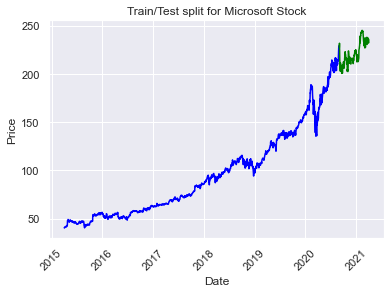

In [21]:
train = df[df.index < pd.to_datetime("2020-09-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2020-09-01", format='%Y-%m-%d')]

plt.plot(train.index, train['Close'], color="blue")
plt.plot(test.index, test['Close'], color="green")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.show()

### Applying ARIMA and SARIMA Models to new Training and Testing Data

Both ARIMA and SARIMA Models will be applied to the new Training and Testing Data.

#### ARIMA

In [22]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (2, 2, 2)) #--Readjust the differencing parameter to what it was before.

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

#### SARIMA

In [23]:
# Define the input
y = train['Close']

# Define the model (adjusted differencing parameters)
SARIMAXmodel = SARIMAX(y, order = (2, 2, 2), seasonal_order=(2,2,2,12))

# Fit the model
SARIMAXmodel = SARIMAXmodel.fit()

# Generate predictions
y_pred_2 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_2 = y_pred_2.conf_int(alpha = 0.05)
y_pred_df_2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_2.index[0], end = y_pred_df_2.index[-1])
y_pred_df_2.index = test.index
y_pred_out_2 = y_pred_df_2["Predictions"]

#### Visualizations

ARIMA RMSE:  27.87838918558446
SARIMA RMSE:  35.500625729249855


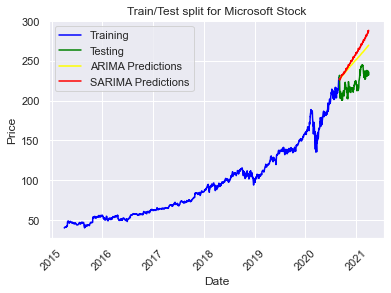

In [24]:
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

When the dataset is split at the new date with the original parameters, the ARIMA and SARIMA models were less accurate in their predictions. However, this time the ARIMA Model seemed to perform better than the SARIMA model. A possible reason for the ARIMA performing better could be that there was less seasonality at that point in the trend and therefore, the SARIMA model overshot its predictions.

The differencing parameters will be adjusted once again for both ARIMA and SARIMA in an attempt to improve the predictions.

#### Improving ARIMA

In [25]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (2, 1, 2)) #--Decreasing the differencing parameter to 1.

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

#### Improving SARIMA

In [26]:
# Define the input
y = train['Close']

# Define the model (adjusted differencing parameters)
SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,1,2,12))

# Fit the model
SARIMAXmodel = SARIMAXmodel.fit()

# Generate predictions
y_pred_2 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_2 = y_pred_2.conf_int(alpha = 0.05)
y_pred_df_2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_2.index[0], end = y_pred_df_2.index[-1])
y_pred_df_2.index = test.index
y_pred_out_2 = y_pred_df_2["Predictions"]

ARIMA RMSE:  13.119970016027949
SARIMA RMSE:  25.903678647548595


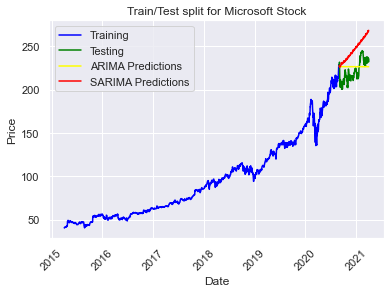

In [27]:
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

Even though the RMSE score suggests that the ARIMA model performed better than the SARIMA model, the plot appears to not be increasing or decreasing. The trend seems to be stagnant (or stationary). Meanwhile, the SARIMA model still trends upward and its RMSE score has shown improvement in its accuracy. This could mean that for this split, reducing the differencing for ARIMA was not necessary.

The ARIMA models differencing parameter will be returned to its prior state while the SARIMA model is further experimented on.

In [28]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (2, 2, 2)) #--Return the differencing parameter to its prior value

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

To improve the SARIMA model, the differencing parameter will be set to zero, meaning that no differencing will be applied. The auto-regressive parameter will be set to 1 for both the non-seasonal and seasonal parameters. This will reduce the number of lag days that are considered for the model.

ARIMA RMSE:  27.87838918558446
SARIMA RMSE:  13.597387814323652


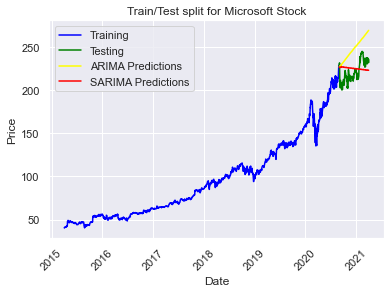

In [29]:
# Define the input
y = train['Close']

# Define the model (adjusted the auto-regressive parameter and dropped the differencing parameter to zero)
SARIMAXmodel = SARIMAX(y, order = (1, 0, 2), seasonal_order=(1,0,2,12))

# Fit the model
SARIMAXmodel = SARIMAXmodel.fit()

# Generate predictions
y_pred_2 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_2 = y_pred_2.conf_int(alpha = 0.05)
y_pred_df_2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_2.index[0], end = y_pred_df_2.index[-1])
y_pred_df_2.index = test.index
y_pred_out_2 = y_pred_df_2["Predictions"]

# Plot both ARIMA and SARIMA models
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

Removing all differencing and reducing the number of lag days to 1 resulted in a lower RMSE score for the SARIMA model. However, like with ARIMA, the trend appears to be heading in a different direction than the actual testing data. This may be influenced by the drop in stock price at the start of the month.

### Using Grid Search to evaluate an ARIMA Model

To find the optimal parameters for the ARIMA Model, the Grid Search method can be applied that will operate on a set of different parameters, then evaluate the performance of each model to discover the best model.

In [30]:
### Define a function for evaluating the ARIMA Model
def eval_ARIMA_model(Y, new_order):
    # Define the model
    ARIMAmodel_02 = ARIMA(Y, order=new_order) #--Dropping the differencing parameter once again.

    # Fit the model
    ARIMAmodel_02 = ARIMAmodel_02.fit()

    # Generate predictions
    Y_pred = ARIMAmodel_02.get_forecast(len(test.index))
    Y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
    Y_pred_df["Predictions"] = ARIMAmodel_02.predict(start = Y_pred_df.index[0], end = Y_pred_df.index[-1])
    Y_pred_df.index = test.index
    Y_pred_out = Y_pred_df["Predictions"]
    
    # Calculate the Root Mean Squared Error (RMSE) for each model
    arima_02_rmse = np.sqrt(mean_squared_error(test["Close"].values, Y_pred_df["Predictions"]))
    return arima_02_rmse
    

In [31]:
### Define a function for evaluating all configurations of the parameters to find the best model
def eval_model(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                a_order = (p,d,q)
                try:
                    rmse = eval_ARIMA_model(dataset, a_order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, a_order
                    print('ARIMA%s RMSE=%.3f' % (a_order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
                    

In [32]:
# Define a set of inputs for each parameter
p_vals = range(0,3)
d_vals = range(0,3)
q_vals = range(0,3)

# Submit the input and parameter sets to the ARIMA model for evaluation
eval_model(y, p_vals, d_vals, q_vals)

ARIMA(0, 0, 0) RMSE=126.555
ARIMA(0, 0, 1) RMSE=126.182
ARIMA(0, 0, 2) RMSE=125.943
ARIMA(0, 1, 0) RMSE=12.771
ARIMA(0, 1, 1) RMSE=12.990
ARIMA(0, 1, 2) RMSE=13.181
ARIMA(0, 2, 0) RMSE=287.719
ARIMA(0, 2, 1) RMSE=21.162
ARIMA(0, 2, 2) RMSE=28.332
ARIMA(1, 0, 0) RMSE=13.418
ARIMA(1, 0, 1) RMSE=13.105
ARIMA(1, 0, 2) RMSE=13.300
ARIMA(1, 1, 0) RMSE=13.066
ARIMA(1, 1, 1) RMSE=13.069
ARIMA(1, 1, 2) RMSE=13.230
ARIMA(1, 2, 0) RMSE=96.651
ARIMA(1, 2, 1) RMSE=27.288
ARIMA(1, 2, 2) RMSE=27.685
ARIMA(2, 0, 0) RMSE=13.185
ARIMA(2, 0, 1) RMSE=13.183
ARIMA(2, 0, 2) RMSE=13.073
ARIMA(2, 1, 0) RMSE=13.071
ARIMA(2, 1, 1) RMSE=13.048
ARIMA(2, 1, 2) RMSE=13.120
ARIMA(2, 2, 0) RMSE=50.152
ARIMA(2, 2, 1) RMSE=27.870
ARIMA(2, 2, 2) RMSE=27.878
Best ARIMA(0, 1, 0) RMSE=12.771


Performing a grid search for the ARIMA model allows the discovery of what parameter values work well and what values do not. For example, when the differencing (d) parameter is set to 2 AND the moving average parameter (q) is set to 0, the method returns the high RMSE values, confirming that these configurations do not work for this dataset. Also, when only the moving average parameter is supplied a value, the model returns high RMSE values as well.

After evaluating each configuration, the grid search returned the best ARIMA model for the dataset. In this case, the model with the parameters (0,1,0) and the best RMSE score.

### Using Grid Search to evaluate a SARIMA model

The Grid Search method will now be applied to the SARIMA model.

In [33]:
# Define a function for evaluating the SARIMA model
def eval_SARIMA_model(Y, non_sn_order, sn_order):
    # Define the model
    SARIMAXmodel_02 = SARIMAX(Y, order = non_sn_order, seasonal_order = sn_order)

    # Fit the model
    SARIMAXmodel_02 = SARIMAXmodel_02.fit()

    # Generate predictions
    Y_pred_2 = SARIMAXmodel_02.get_forecast(len(test.index))
    Y_pred_df_2 = Y_pred_2.conf_int(alpha = 0.05)
    Y_pred_df_2["Predictions"] = SARIMAXmodel_02.predict(start = Y_pred_df_2.index[0], end = Y_pred_df_2.index[-1])
    Y_pred_df_2.index = test.index
    Y_pred_out_2 = Y_pred_df_2["Predictions"]
    
    # Calculate the Root Mean Squared Error (RMSE) for each model
    sarima_02_rmse = np.sqrt(mean_squared_error(test["Close"].values, Y_pred_df_2["Predictions"]))
    return sarima_02_rmse

In [34]:
### Define a function for evaluating all parameters to find the best SARIMA model
def eval_all_SARIMA_models(dataset, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                s1_order = (p,d,q)
                                s2_order = (P,D,Q,m)
                                try:
                                    rmse = eval_SARIMA_model(dataset, s1_order, s2_order)
                                    if rmse < best_score:
                                        best_score, best_cfg = rmse, (s1_order, s2_order)
                                    print('SARIMA%s RMSE=%.3f' % ((s1_order, s2_order), rmse))
                                except:
                                    continue
    print('Best SARIMA%s RMSE=%.3f' % (best_cfg, best_score))

To save computational resources and time, the non-seasonal parameters will be those from the best ARIMA model (0,1,0). The grid search will be performed on the seasonal parameters only.

In [35]:
# Non-seasonal parameters
p_vals = range(0,1)
d_vals = range(1,2)
q_vals = range(0,1)

# Seasonal parameters
P_vals = range(0,3)
D_vals = range(0,3)
Q_vals = range(0,3)
m_vals = range(12, 13)

# Submit the input and parameter sets to the SARIMA model for evaluation
eval_all_SARIMA_models(y,p_vals,d_vals,q_vals,P_vals,D_vals,Q_vals,m_vals)

SARIMA((0, 1, 0), (0, 0, 0, 12)) RMSE=12.771
SARIMA((0, 1, 0), (0, 0, 1, 12)) RMSE=13.263
SARIMA((0, 1, 0), (0, 0, 2, 12)) RMSE=12.729
SARIMA((0, 1, 0), (0, 1, 0, 12)) RMSE=117.520
SARIMA((0, 1, 0), (0, 1, 1, 12)) RMSE=22.483
SARIMA((0, 1, 0), (0, 1, 2, 12)) RMSE=22.128
SARIMA((0, 1, 0), (0, 2, 0, 12)) RMSE=456.456
SARIMA((0, 1, 0), (0, 2, 1, 12)) RMSE=121.999
SARIMA((0, 1, 0), (0, 2, 2, 12)) RMSE=30.503
SARIMA((0, 1, 0), (1, 0, 0, 12)) RMSE=13.228
SARIMA((0, 1, 0), (1, 0, 1, 12)) RMSE=12.985
SARIMA((0, 1, 0), (1, 0, 2, 12)) RMSE=12.732
SARIMA((0, 1, 0), (1, 1, 0, 12)) RMSE=96.708
SARIMA((0, 1, 0), (1, 1, 1, 12)) RMSE=22.191
SARIMA((0, 1, 0), (1, 1, 2, 12)) RMSE=21.870
SARIMA((0, 1, 0), (1, 2, 0, 12)) RMSE=605.417
SARIMA((0, 1, 0), (1, 2, 1, 12)) RMSE=100.666
SARIMA((0, 1, 0), (1, 2, 2, 12)) RMSE=30.522
SARIMA((0, 1, 0), (2, 0, 0, 12)) RMSE=12.756
SARIMA((0, 1, 0), (2, 0, 1, 12)) RMSE=12.751
SARIMA((0, 1, 0), (2, 0, 2, 12)) RMSE=12.726
SARIMA((0, 1, 0), (2, 1, 0, 12)) RMSE=56.982
SARIM

With the same non-seasonal parameters as the best ARIMA mode, the SARIMA model containing the seasonal parameters of (2,0,2,12) gave the best optimal performance with a RMSE of 12.726. Similar to the ARIMA model, increasing the differencing while having a zero moving average resulted in high RMSE values. Also, the best model did not include auto-regression.

### Plotting the best ARIMA and SARIMA models

The results from both Grid Searches will be plotted by plugging in the parameters manually as it was performed before.

In [36]:
# Define the input
y = train['Close']

# Define the model
ARIMAmodel = ARIMA(y, order = (0, 1, 0)) #--Dropping the differencing parameter once again.

# Fit the model
ARIMAmodel = ARIMAmodel.fit()

# Generate predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) #--Assigning a high alpha value to apply greater weight for recent values
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

ARIMA RMSE:  12.771449054782472
SARIMA RMSE:  12.726200633792875


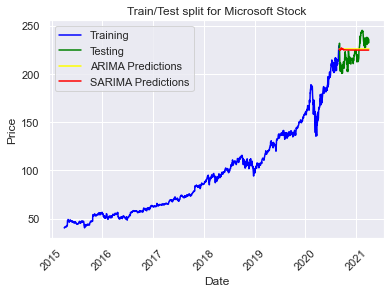

In [37]:
# Define the model
SARIMAXmodel = SARIMAX(y, order = (0, 1, 0), seasonal_order=(2,0,2,12))

# Fit the model
SARIMAXmodel = SARIMAXmodel.fit()

# Generate predictions
y_pred_2 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_2 = y_pred_2.conf_int(alpha = 0.05)
y_pred_df_2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_2.index[0], end = y_pred_df_2.index[-1])
y_pred_df_2.index = test.index
y_pred_out_2 = y_pred_df_2["Predictions"]

# Plot both ARIMA and SARIMA models
plt.plot(train.index, train['Close'], color="blue", label="Training")
plt.plot(test.index, test['Close'], color="green", label="Testing")
plt.plot(y_pred_out, color="yellow", label="ARIMA Predictions")
plt.plot(y_pred_out_2, color="red", label="SARIMA Predictions")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft Stock")
plt.legend()

# Calculate the Root Mean Squared Error (RMSE) for each model
arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df_2["Predictions"]))
print("SARIMA RMSE: ", sarima_rmse)

The plot shows that when the SARIMA model is given the same non-seasonal parameters as the best ARIMA model to find the best SARIMA model from a evaluation of different configuration of its seasonal parameters, the result is a similar performance when it comes to predicting the future stock price for Microsoft. A better analysis could have been provided if the functions for performing the grid search on SARIMA were able to evaluate the results of various non-seasonal parameters. This, however, would require an extensive amount of resources due to the number of computations to perform such an evaluation. Regardless, this demonstrates how a Grid Search can be an effective method for finding the optimal parameters that can provide the best model when forecasting a time series.